In [49]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import det
import math

In [50]:
def maillage(n):
    #
    # Une discretisation possible d'une EDP elliptique sur le domaine ]0,1[ x ]0,1[
    # Le carre [0,1]x[0,1] est maille uniquement avec des triangles;
    # Les conditions limites sont de type Dirichlet uniquement   => neumann  =[];
    #
    # Entrees :
    # n : nombre de points par cote du care => Npts points de discretisation au
    # total
    #
    # Sorties :
    # coordinates : matrice a deux colonnes. Chaque ligne contient les
    # coordonnes 2D d'un des points de la discretisation. Ces sommets seront
    # identifies a l'indice de la ligne correspondante dans la matrice
    # coordinates.
    # elements3 : matrice a trois colonnes. Chaque ligne contient les indices
    # des sommets d'un element triangle, dans le sens antihoraire.
    # dirichlet : vecteur colonne des indices des sommets de la frontiere de
    # Dirichlet.
    # neumann : matrice a deux colonnes. Chaque ligne contient les indices
    # des deux sommets d'une arete de la frontiere de Neumann.
    # (neumann est vide sur cet exemple)
    #
    ##################################################################################
    h = 1 / (n - 1)
    npoin = n * n
    nelem = 2 * (n - 1) * (n - 1)
    coordinates = np.zeros((npoin, 2))
    elements3 = (np.zeros((nelem, 3))).astype(int)
    neumann = []
    dirichlet = (np.zeros((4 * n - 4, 1))).astype(int)
    # Coordonnees et connectivites :
    e = -1
    p = -1
    x = np.zeros((n + 1, 1))
    x[n, 0] = 1.0
    for l in range(n + 1):
        x[l, 0] = l * h
    for j in range(n):
        for i in range(n):
            p = p + 1
            coordinates[p, 0] = x[i, 0]
            coordinates[p, 1] = x[j, 0]
            if (i != n - 1) & (j != n - 1):
                p1 = p
                p2 = p1 + 1
                p3 = p1 + n
                p4 = p2 + n
                e = e + 1
                elements3[e, 0] = p1
                elements3[e, 1] = p2
                elements3[e, 2] = p3
                e = e + 1
                elements3[e, 0] = p4
                elements3[e, 1] = p3
                elements3[e, 2] = p2
    # Liste des sommets de la frontiere de Dirichlet:
    p = -1
    for j in range(n):
        p = p + 1
        dirichlet[p, 0] = j
    for j in range(n * 2 - 1, n * (n - 1), n):
        p = p + 1
        dirichlet[p, 0] = j
    for j in range(n * n - 1, n * n - n - 1, -1):
        p = p + 1
        dirichlet[p, 0] = j
    for j in range(n * n - 2 * n, n - 1, -n):
        p = p + 1
        dirichlet[p, 0] = j

    return coordinates, elements3, dirichlet, neumann

In [51]:
def show(coordinates,u):
#
# Fonction d'affichage de la solution u sur le maillage defini par
# elements3, coordinates.
#
# Entrees:
# elements3 : matrice a trois colonnes contenant les elements triangles
# de la discretisation, identifies par les indices de leurs trois
# sommets.
# coordinates : matrice a deux colonnes contenant les coordonnes 2D des
# points de la discretisation.
# u : vecteur colonne de longueur egale au nombre de lignes de
# coordinates contenant les valeurs de la solution a afficher aux
# points de la discretisation.
#
# Sorties : Aucune, mais la fonction doit s'afficher dans une figure.
##########################################################################
    ax= plt.figure().add_subplot(projection='3d')
    ax.plot_trisurf(coordinates[:,0],coordinates[:,1],u,linewidth=0.2,antialiased=True)
    plt.show()

**Partie I : maillage triangulaire et conditions de Dirichlet**

raideur=array([[ 1. ,  0.5,  0. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  2. ,  0.5,  0. , -1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.5,  1. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0. ,  2. ,  1. ,  0. , -0.5,  0. ,  0. ],
       [ 0. , -1. ,  0. ,  1. ,  4. ,  1. ,  0. , -1. ,  0. ],
       [ 0. ,  0. , -0.5,  0. ,  1. ,  2. ,  0. ,  0. , -0.5],
       [ 0. ,  0. ,  0. , -0.5,  0. ,  0. ,  1. ,  0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -1. ,  0. ,  0.5,  2. ,  0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. ,  0.5,  1. ]]) b=array([[0.00363149],
       [0.03213317],
       [0.04616936],
       [0.03213317],
       [0.14762321],
       [0.10708351],
       [0.04616936],
       [0.10708351],
       [0.03413134]])


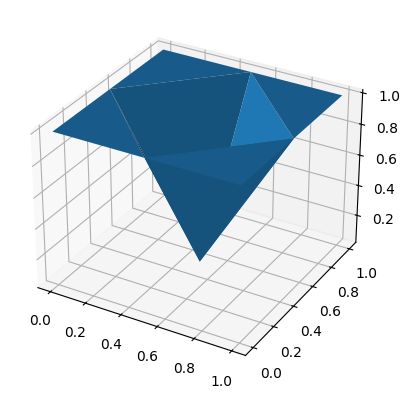

[1.        1.        1.        1.        0.0369058 1.        1.
 1.        1.       ]


In [52]:
from numpy.linalg import norm

TAILLE_MAILLAGE = 3
coordinates, elements3, dirichlet, neumann = maillage(TAILLE_MAILLAGE)


def triangle_nodes(i: int):
    return [
        coordinates[elements3[i][0], :],
        coordinates[elements3[i][1], :],
        coordinates[elements3[i][2], :],
    ]

def add_to_b_i(coords):
    x_1, y_1 = coords[0]
    x_2, y_2 = coords[1]
    x_3, y_3 = coords[2]
    α = det(np.array([[x_2 - x_1, x_3 - x_1], [y_2 - y_1, y_3 - y_1]]))

    x_G = np.mean([x_1, x_2, x_3])
    y_G = np.mean([y_1, y_2, y_3])

    return α / 6 * f(x_G, y_G) 



def triangle_area(i: int):
    nodes = triangle_nodes(i)

    a = norm(nodes[0] - nodes[1])
    b = norm(nodes[1] - nodes[2])
    c = norm(nodes[2] - nodes[0])

    # avec la formule de héron
    s = 1 / 2 * (a + b + c)
    return math.sqrt(s * (s - a) * (s - b) * (s - c))


def nabla_η(j: int, alpha: float):
    nodes = triangle_nodes(j)
    return (1 / alpha) * np.array(
        [
            nodes[(j + 1) % 3][1] - nodes[(j + 2) % 3][1],
            nodes[(j + 2) % 3][0] - nodes[(j + 1) % 3][0],
        ]
    )


def raideur_locale(i: int):
    nodes = triangle_nodes(i)
    x_1, y_1 = nodes[0]
    x_2, y_2 = nodes[1]
    x_3, y_3 = nodes[2]
    α = det(np.array([[x_2 - x_1, x_3 - x_1], [y_2 - y_1, y_3 - y_1]]))

    # print(f"{α = }")

    return np.array(
        [
            [
                triangle_area(i) * np.transpose(nabla_η(j, α)) @ nabla_η(i, α)
                for j in range(3)
            ]
            for i in range(3)
        ]
    )


def raideur_globale():
    b = np.zeros((TAILLE_MAILLAGE**2, 1))
    mesh_size = coordinates.shape[0]
    result = np.zeros((mesh_size, mesh_size))
    for i in range(len(elements3)):
        nodes = elements3[i]
        raideur = raideur_locale(i)

        for i in range(3):
            for j in range(3):
                result[nodes[i], nodes[j]] += raideur[i, j]
        
        b[nodes, :] += add_to_b_i(coordinates[nodes])
    return result, b


# np.savetxt("feur.csv", raideur_globale(), delimiter=",", fmt="%.0f")


def f(x, y):
    return math.sin(math.pi * x * y)


def u_d(x, y):
    return 1


def U(k: int):
    x, y = coordinates[k]
    max_x = np.max(coordinates[:, 0])
    max_y = np.max(coordinates[:, 1])
    if x == 0 or y == 0 or x == max_x or y == max_y:
        return u_d(x, y)
    return 0



# b = np.array([b_i(i) for i in range(coordinates.shape[0])])

# print(f"{elements3.shape = } {raideur_globale().shape = }; {b.shape = }")

result = np.zeros((1, TAILLE_MAILLAGE**2))

# interieur_raideur_globale = raideur_globale()[slice_at:-slice_at, slice_at:-slice_at]
# interieur_b = b[slice_at:-slice_at]
 
# # # on fait un masque pour calculer le résultat uniquement sur le complémentaire de dirichlet
# mask = np.ones(TAILLE_MAILLAGE**2, dtype=bool)
# mask[dirichlet] = False
# mask = mask[0 : len(mask), mask]
# interieur_raideur_globale = raideur_globale()[mask]

# result = np.zeros((TAILLE_MAILLAGE**2, 1))
# result[mask] = np.linalg.solve(interieur_raideur_globale, b[mask])

for p in dirichlet:
    result[0, p] = u_d(coordinates[p, 0], coordinates[p, 1])

raideur, b  = raideur_globale()
print(f"{raideur=} {b=}")
b = b  - np.dot(raideur, result.T)

interior = np.setdiff1d(np.arange(TAILLE_MAILLAGE**2), dirichlet[:, 0].T)

result[0, interior] = np.linalg.solve(
    raideur[np.ix_(interior, interior)], b[interior, 0]
)
result = result[0, :]

show(coordinates, result)

print(result)

**Partie II : maillage mixte et ajoût des conditions de Neumann**

In [53]:
############################# Maillage mixte ################
e3=np.array([[1,2,12],[2,3,12],[3,4,14],[4,5,14],[2,15,3],[3,15,4]]).astype(int)
e4=np.array([[0,1,12,11],[11,12,13,10],[12,3,14,13],[10,13,8,9],[13,14,7,8],[14,5,6,7]]).astype(int)
dds=np.array([2,15,4,6,7,8,9,10,11,0]).astype(int)
nns=np.array([[4,5],[5,6],[0,1],[1,2]]).astype(int)
ccs=np.array([[0.,0.],[0.33333333333333,0],[0.53333333333333,0.],
                      [0.66666666666667,0.33333333333333],[1.,0.47],[1,0.66666666666667],
                     [1.,1.],[0.66666666666667,1.],[0.33333333333333,1.], [0.,1.],
                     [0.,0.66666666666667],[0.,0.33333333333333],[0.33333333333333,0.33333333333333],
                     [0.33333333333333,0.66666666666667],[0.66666666666667,0.66666666666667],[1.,0.]])

In [54]:
from numpy.linalg import norm

TAILLE_MAILLAGE = len(ccs)


def triangle_nodes(i: int):
    return [
        coordinates[elements3[i][0], :],
        coordinates[elements3[i][1], :],
        coordinates[elements3[i][2], :],
    ]

def add_to_b_i(coords):
    x_1, y_1 = coords[0]
    x_2, y_2 = coords[1]
    x_3, y_3 = coords[2]
    α = det(np.array([[x_2 - x_1, x_3 - x_1], [y_2 - y_1, y_3 - y_1]]))

    x_G = np.mean([x_1, x_2, x_3])
    y_G = np.mean([y_1, y_2, y_3])

    return α / 6 * f(x_G, y_G) 



def triangle_area(i: int):
    nodes = triangle_nodes(i)

    a = norm(nodes[0] - nodes[1])
    b = norm(nodes[1] - nodes[2])
    c = norm(nodes[2] - nodes[0])

    # avec la formule de héron
    s = 1 / 2 * (a + b + c)
    return math.sqrt(s * (s - a) * (s - b) * (s - c))


def nabla_η(j: int, alpha: float):
    nodes = triangle_nodes(j)
    return (1 / alpha) * np.array(
        [
            nodes[(j + 1) % 3][1] - nodes[(j + 2) % 3][1],
            nodes[(j + 2) % 3][0] - nodes[(j + 1) % 3][0],
        ]
    )


def raideur_locale(i: int):
    nodes = triangle_nodes(i)
    x_1, y_1 = nodes[0]
    x_2, y_2 = nodes[1]
    x_3, y_3 = nodes[2]
    α = det(np.array([[x_2 - x_1, x_3 - x_1], [y_2 - y_1, y_3 - y_1]]))

    # print(f"{α = }")

    return np.array(
        [
            [
                triangle_area(i) * np.transpose(nabla_η(j, α)) @ nabla_η(i, α)
                for j in range(3)
            ]
            for i in range(3)
        ]
    )


def raideur_globale():
    b = np.zeros(( TAILLE_MAILLAGE, 1))
    mesh_size = coordinates.shape[0]
    result = np.zeros((mesh_size, mesh_size))
    for i in range(len(e3)):
        nodes = e3[i]
        raideur = raideur_locale(i)

        for i in range(3):
            for j in range(3):
                result[nodes[i], nodes[j]] += raideur[i, j]
        
        b[nodes, :] += add_to_b_i(ccs[nodes])
    return result, b


# np.savetxt("feur.csv", raideur_globale(), delimiter=",", fmt="%.0f")


def f(x, y):
    return math.sin(math.pi * x * y)


def u_d(x, y):
    return 1


def U(k: int):
    x, y = coordinates[k]
    max_x = np.max(coordinates[:, 0])
    max_y = np.max(coordinates[:, 1])
    if x == 0 or y == 0 or x == max_x or y == max_y:
        return u_d(x, y)
    return 0



# b = np.array([b_i(i) for i in range(coordinates.shape[0])])

# print(f"{elements3.shape = } {raideur_globale().shape = }; {b.shape = }")

result = np.zeros((TAILLE_MAILLAGE, 1))

# interieur_raideur_globale = raideur_globale()[slice_at:-slice_at, slice_at:-slice_at]
# interieur_b = b[slice_at:-slice_at]
 
# # # on fait un masque pour calculer le résultat uniquement sur le complémentaire de dirichlet
# mask = np.ones(TAILLE_MAILLAGE**2, dtype=bool)
# mask[dirichlet] = False
# mask = mask[0 : len(mask), mask]
# interieur_raideur_globale = raideur_globale()[mask]

# result = np.zeros((TAILLE_MAILLAGE**2, 1))
# result[mask] = np.linalg.solve(interieur_raideur_globale, b[mask])

for p in dds:
    result[p, 0] = u_d(ccs[p, 0], ccs[p, 1])

raideur, b  = raideur_globale()
print(f"{raideur=} {b=}")
b = b  - np.dot(raideur, result)

interior = np.setdiff1d(np.arange(TAILLE_MAILLAGE), dds.T)

result[interior, 0] = np.linalg.solve(
    raideur[np.ix_(interior, interior)], b[interior, 0]
)
result = result[:, 0]

show(ccs, result)

print(result)


IndexError: index 12 is out of bounds for axis 1 with size 9

**Compléments  :  un nouveau terme dans l'EDP**